In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

According to first article:
- global thresholding with blue channel
- global thresholding with b channel in Lab
- 3d color clustering with XYZ

# Image 1

In [2]:
# get a sample image
img0 = cv2.imread("./data/Train/Train/ISIC_0000000.jpg")
img0_mask = cv2.imread("./data/Train/Train/ISIC_0000000_seg.png")

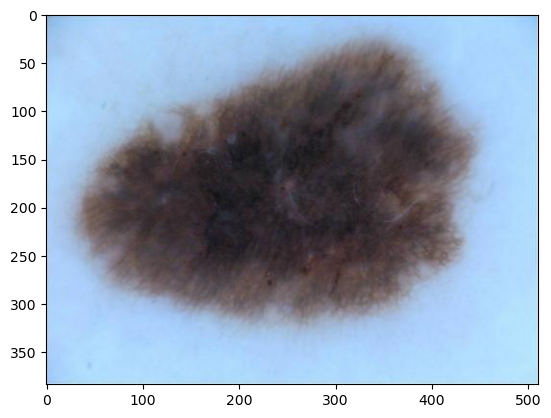

In [21]:
# show the image
plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))

In [3]:
# convert img0 to RGB 
img0_rgb = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
# convert img0 to CIE-Lab
img0_lab = cv2.cvtColor(img0, cv2.COLOR_BGR2Lab)
# convert img0 to CIE-XYZ
img0_xyz = cv2.cvtColor(img0, cv2.COLOR_BGR2XYZ)

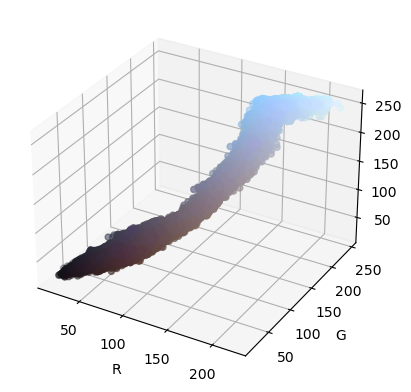

In [4]:
# plot the 3d cloud points in RGB space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img0_rgb[:,:,0].flatten(), img0_rgb[:,:,1].flatten(), img0_rgb[:,:,2].flatten(), c=img0_rgb.reshape(-1,3)/255)
# set the labels
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()


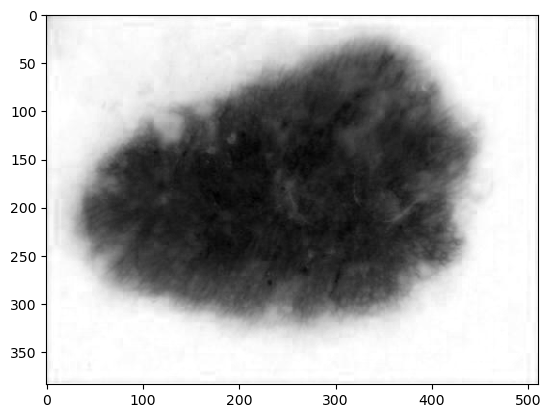

In [7]:
# show the blue channel of the image
plt.imshow(img0_rgb[:,:,2], cmap='gray')

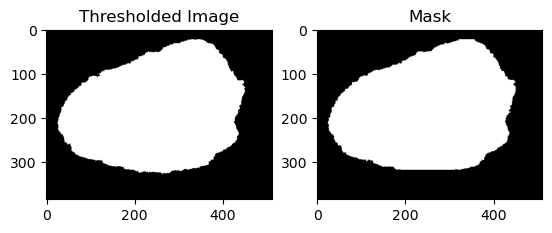

0.9855973071819271

In [20]:
# threshold the blue channel, and inverse the threshold
_, img0_thresh = cv2.threshold(img0_rgb[:,:,2], 200, 255, cv2.THRESH_BINARY)
img0_thresh = cv2.bitwise_not(img0_thresh)

# show the thresholded image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0_thresh, cmap='gray')
ax[0].title.set_text('Thresholded Image')
ax[1].imshow(img0_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()


# get the iou between the thresholded image and the mask
intersection = np.logical_and(img0_thresh, img0_mask[:,:,0])
union = np.logical_or(img0_thresh, img0_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou

0.9629637396975862

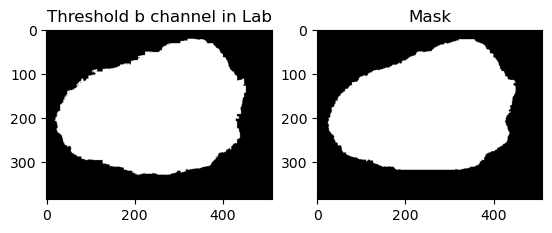

In [82]:
# threshold the b channel in the lab image
_, img0_lab_thresh = cv2.threshold(img0_lab[:,:,2], 110, 255, cv2.THRESH_BINARY)
# img0_lab_thresh = cv2.bitwise_not(img0_lab_thresh)

# select the threshold result as the largest connected component
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img0_lab_thresh)
largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
img0_lab_thresh = (labels == largest_label).astype(np.uint8) * 255 



# show alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0_lab_thresh, cmap='gray')
ax[0].title.set_text('Threshold b channel in Lab')
ax[1].imshow(img0_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')

# get the iou
intersection = np.logical_and(img0_lab_thresh, img0_mask[:,:,0])
union = np.logical_or(img0_lab_thresh, img0_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou

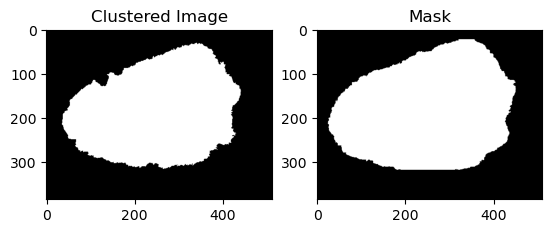

In [85]:
# perform 3d color clustering on the xyz image
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
attempts = 10
ret,label,center=cv2.kmeans(img0_xyz.reshape(-1,3).astype(np.float32),k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img0_xyz.shape))

# invert the cluster
res2 = cv2.bitwise_not(res2)

# show the clustered image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(res2[:,:,0], cmap='gray')
ax[0].title.set_text('Clustered Image')
ax[1].imshow(img0_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()


# Image 2

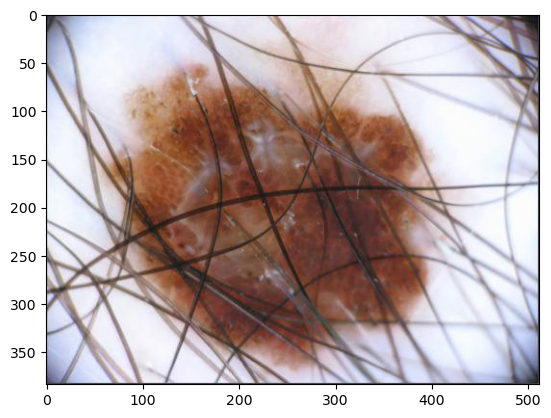

In [61]:
# select another image
img1 = cv2.imread("./data/Train/Train/ISIC_0000043.jpg")
img1_mask = cv2.imread("./data/Train/Train/ISIC_0000043_seg.png")
# show the image
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [62]:
# convert img1 to RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# convert img1 to Lab
img1_lab = cv2.cvtColor(img1, cv2.COLOR_BGR2Lab)
# convert img1 to XYZ
img1_xyz = cv2.cvtColor(img1, cv2.COLOR_BGR2XYZ)

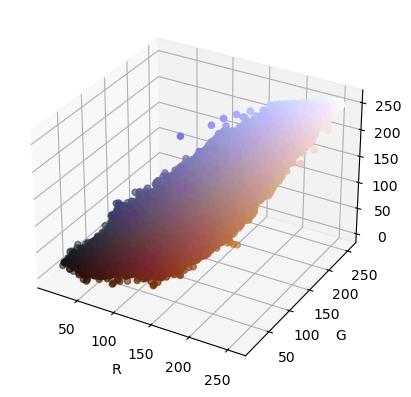

In [38]:
# plot the 3d cloud points in RGB space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img1_rgb[:,:,0].flatten(), img1_rgb[:,:,1].flatten(), img1_rgb[:,:,2].flatten(), c=img1_rgb.reshape(-1,3)/255)
# set the labels
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

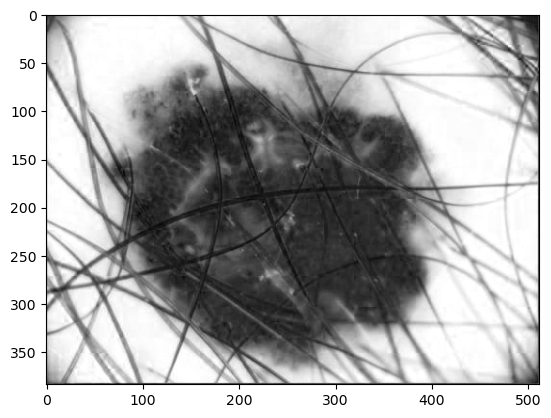

In [39]:
# show the blue channel of the image
plt.imshow(img1_rgb[:,:,2], cmap='gray')

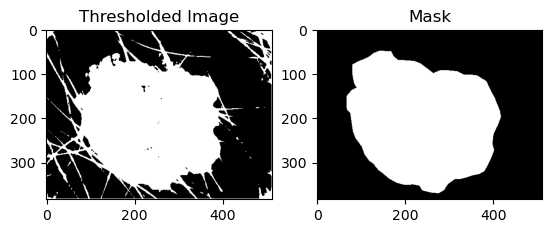

0.7820713572592086

In [93]:
# threshold the blue channel, and inverse the threshold
_, img1_thresh = cv2.threshold(img1_rgb[:,:,2], 150, 255, cv2.THRESH_BINARY)
img1_thresh = cv2.bitwise_not(img1_thresh)

# show the thresholded image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1_thresh, cmap='gray')
ax[0].title.set_text('Thresholded Image')
ax[1].imshow(img1_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()

# get the iou between the thresholded image and the mask
intersection = np.logical_and(img1_thresh, img1_mask[:,:,0])
union = np.logical_or(img1_thresh, img1_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou

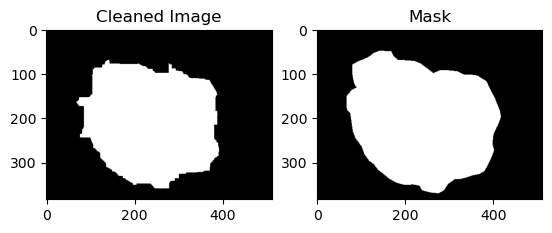

0.8456949790225369

In [98]:
# use morphological operations closing to clean the thresholded image, removing the hair
kernel = np.ones((10,10), np.uint8)
img1_thresh_clean = cv2.morphologyEx(img1_thresh, cv2.MORPH_ERODE, kernel)

# select the threshold result as the largest connected component
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img1_thresh_clean)
largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
img1_thresh_clean = (labels == largest_label).astype(np.uint8) * 255

# fill the holes in the thresholded image
img1_thresh_clean = cv2.morphologyEx(img1_thresh_clean, cv2.MORPH_CLOSE, np.ones((30,30), np.uint8))


# # apply closing to the thresholded image to remove boarder positives
# img1_thresh_clean = cv2.morphologyEx(img1_thresh_clean, cv2.MORPH_OPEN, np.ones((10,10), np.uint8))

# show the cleaned image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1_thresh_clean, cmap='gray')
ax[0].title.set_text('Cleaned Image')
ax[1].imshow(img1_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()

# get the iou between the cleaned image and the mask
intersection = np.logical_and(img1_thresh_clean, img1_mask[:,:,0])
union = np.logical_or(img1_thresh_clean, img1_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou


# Image 3

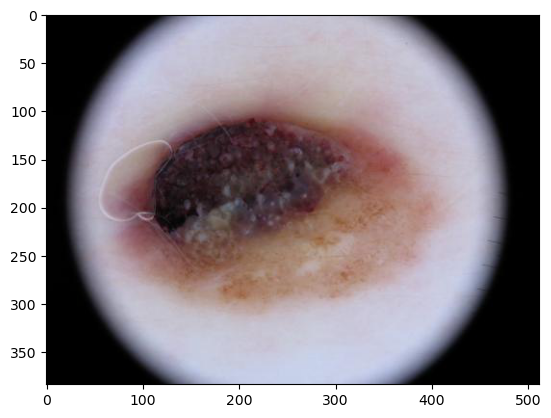

In [86]:
# select another image
img2 = cv2.imread("./data/Train/Train/ISIC_0000274.jpg")
img2_mask = cv2.imread("./data/Train/Train/ISIC_0000274_seg.png")
# show the image
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [87]:
# convert img2 to RGB
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# convert img2 to Lab
img2_lab = cv2.cvtColor(img2, cv2.COLOR_BGR2Lab)
# convert img2 to XYZ
img2_xyz = cv2.cvtColor(img2, cv2.COLOR_BGR2XYZ)

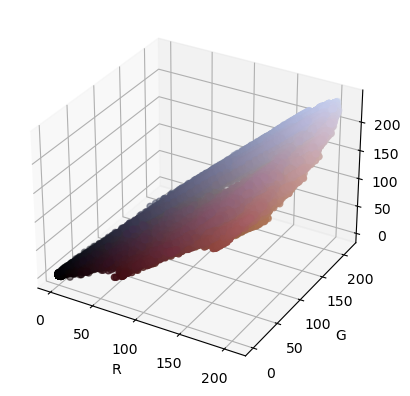

In [88]:
# plot the 3d cloud points in RGB space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img2_rgb[:,:,0].flatten(), img2_rgb[:,:,1].flatten(), img2_rgb[:,:,2].flatten(), c=img2_rgb.reshape(-1,3)/255)
# set the labels
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

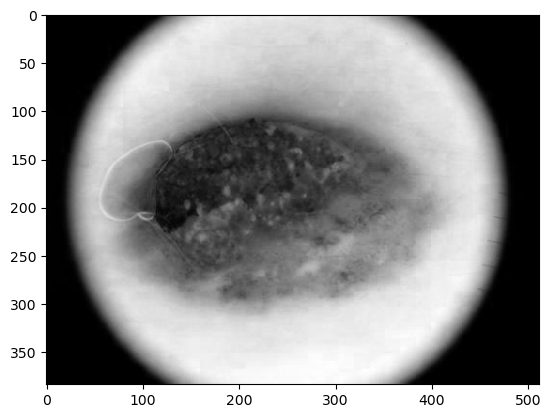

In [90]:
# show the blue channel of the image
plt.imshow(img2_rgb[:,:,2], cmap='gray')

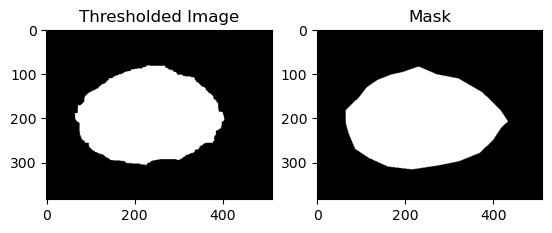

0.8652777552772692

In [99]:
# threshold the blue channel, and inverse the threshold
_, img2_thresh = cv2.threshold(img2_rgb[:,:,2], 150, 255, cv2.THRESH_BINARY)
img2_thresh = cv2.bitwise_not(img2_thresh)

# the threshold result as the largest connected component
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2_thresh)
largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
img2_thresh = (labels == largest_label).astype(np.uint8) * 255

# fill the holes in the thresholded image
img2_thresh = cv2.morphologyEx(img2_thresh, cv2.MORPH_CLOSE, np.ones((30,30), np.uint8))


# show the thresholded image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img2_thresh, cmap='gray')
ax[0].title.set_text('Thresholded Image')
ax[1].imshow(img2_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()

# get the iou between the thresholded image and the mask
intersection = np.logical_and(img2_thresh, img2_mask[:,:,0])
union = np.logical_or(img2_thresh, img2_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou

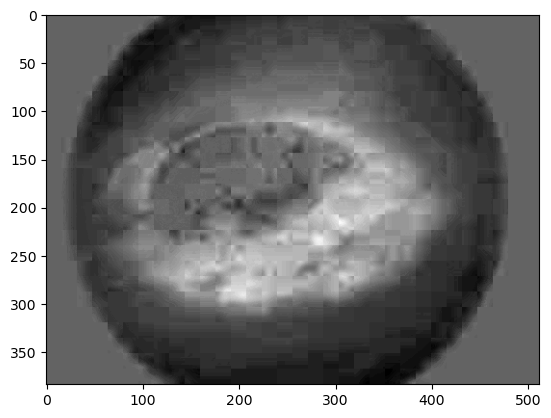

In [107]:
# show the b channel of the lab image
plt.imshow(img2_lab[:,:,2], cmap='gray')

0.8091387480714128

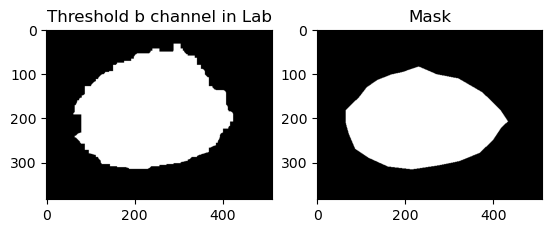

In [111]:
# threshold the b channel in the lab image
_, img2_lab_thresh = cv2.threshold(img2_lab[:,:,2], 125, 255, cv2.THRESH_BINARY)
# img2_lab_thresh = cv2.bitwise_not(img2_lab_thresh)

# select the threshold result as the largest connected component
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img2_lab_thresh)
largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
img2_lab_thresh = (labels == largest_label).astype(np.uint8) * 255

# fill the holes in the thresholded image
img2_lab_thresh = cv2.morphologyEx(img2_lab_thresh, cv2.MORPH_CLOSE, np.ones((30,30), np.uint8))

# show the thresholded image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(img2_lab_thresh, cmap='gray')
ax[0].title.set_text('Threshold b channel in Lab')
ax[1].imshow(img2_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')

# get the iou
intersection = np.logical_and(img2_lab_thresh, img2_mask[:,:,0])
union = np.logical_or(img2_lab_thresh, img2_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

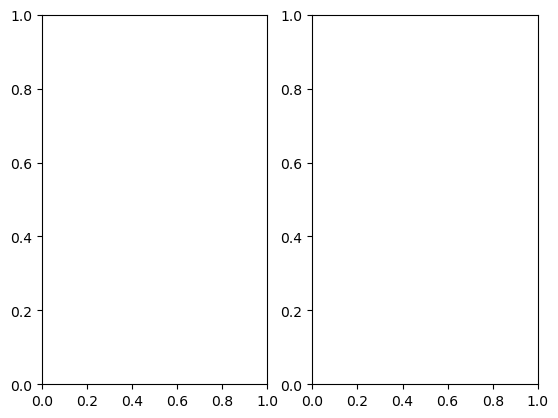

In [128]:
# perform 3d color clustering on the xyz image
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
attempts = 10
ret,label,center=cv2.kmeans(img2_xyz.reshape(-1,3).astype(np.float32),k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img2_xyz.shape))

# invert the cluster
res2 = cv2.bitwise_not(res2)

# select the cluster result as the largest connected component
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(res2[:,:,0])
largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
res2 = (labels == largest_label).astype(np.uint8) * 255



# show the clustered image alongside the mask
fig, ax = plt.subplots(1,2)
ax[0].imshow(res2[:,:,0], cmap='gray')
ax[0].title.set_text('Clustered Image')
ax[1].imshow(img2_mask[:,:,0], cmap='gray')
ax[1].title.set_text('Mask')
plt.show()
# get the iou
intersection = np.logical_and(res2[:,:,0], img2_mask[:,:,0])
union = np.logical_or(res2[:,:,0], img2_mask[:,:,0])
iou = np.sum(intersection) / np.sum(union)
iou